# Watershed Pixel Masks

In [1]:
# Required imports:

import os
import re
import sys

import geopandas as gpd

sys.path.append(os.path.join("..", "code"))
from cnn_model import *
from tif_files import *
from usgs_drainage_areas import USGSDrainageArea
from utils import get_swe_mask, plot_masks

DIR = os.getcwd()
DATA_DIR = os.path.join(os.path.dirname(DIR), "data")
BASIN_DIR = os.path.join(DATA_DIR, "usgs_basins")
SAMPLE_DIR = os.path.join(DATA_DIR, "sample_images")

# TIF Files from GEE

## Example

* __Ratio Mask__ gives the percentage of each pixel which intersects the drainage area.
* __Bool Mask__ returns 1 if any of the pixel intersects the drainage area, else 0.

Calling the `plot_tif_mask` function below will automatically compute the watershed mask if it isn't already saved.

In [2]:
def plot_tif_mask(gage, band):
    files = [f for f in os.listdir(SAMPLE_DIR) if (band.lower() in f.lower()) and (gage in f)]
    assert len(files) == 1
    fn = files[0]
    tif_fp = os.path.join(SAMPLE_DIR, fn)
    tif = TifFile(tif_fp)
    gj_fp = os.path.join(BASIN_DIR, f"{gage}.geojson")
    fig = tif.plot_mask(gage, band, suptitle=f"{gage} - {band}")
    return tif

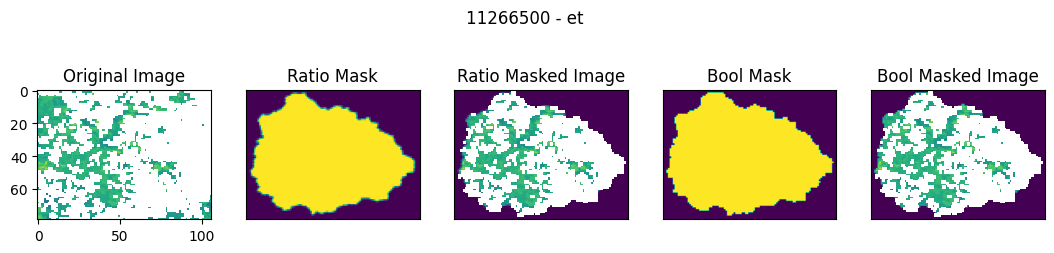

In [3]:
gage = "11266500"
band = "et"
tif = plot_tif_mask(gage, band)

#### Compare to the original USGS drainage area map

In [4]:
gj_fp = os.path.join(BASIN_DIR, f"11266500.geojson")
da = USGSDrainageArea(gj_fp)
da.fmap(width="100%", height="100%", zoom_start=11)

## Plot for all streamgages / bands

../code/tif_files.py:222: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(1, 5, figsize=(13, 3))


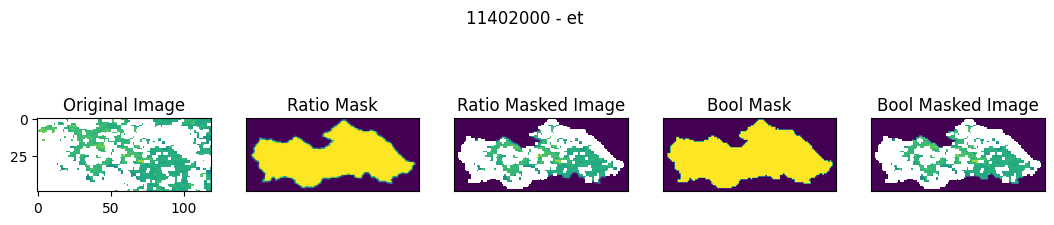

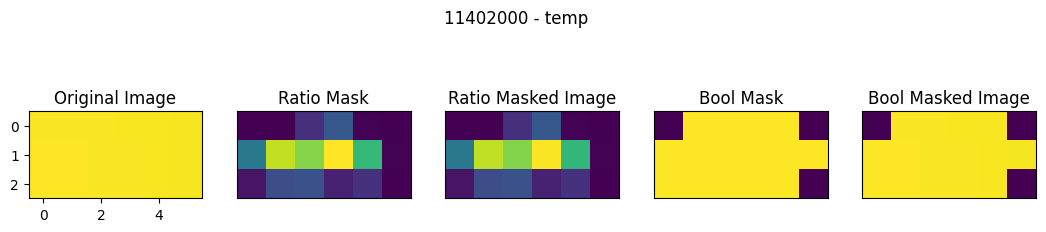

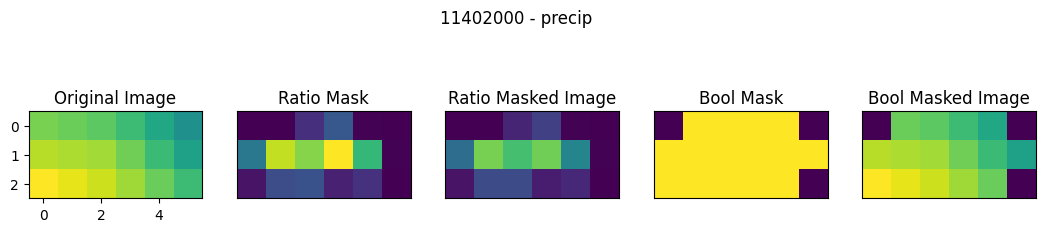

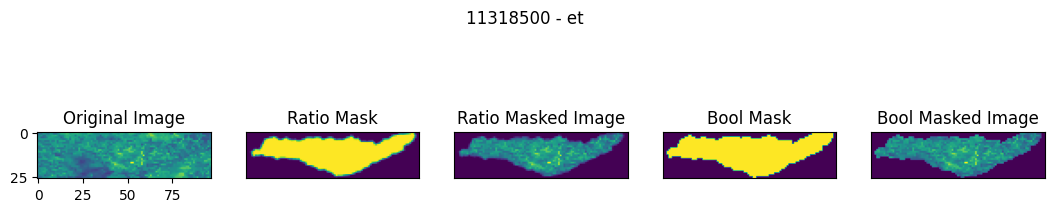

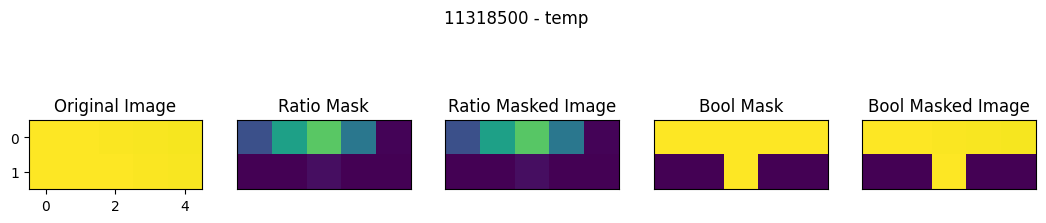

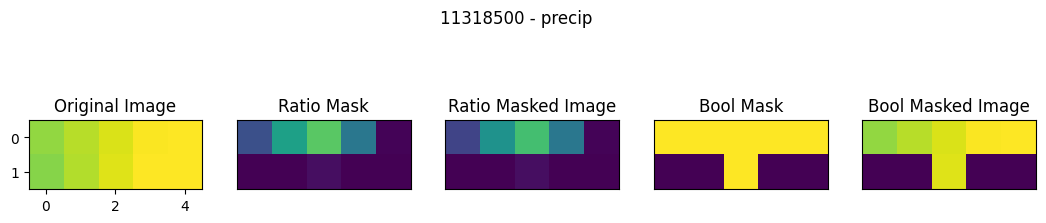

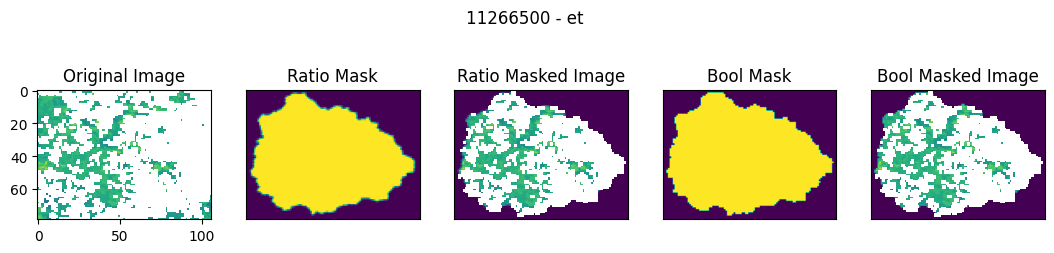

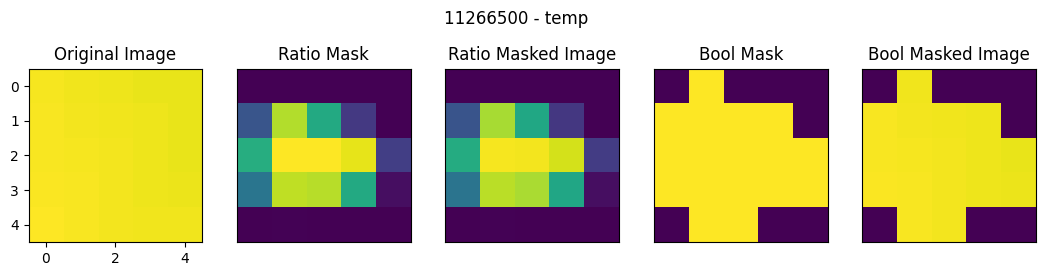

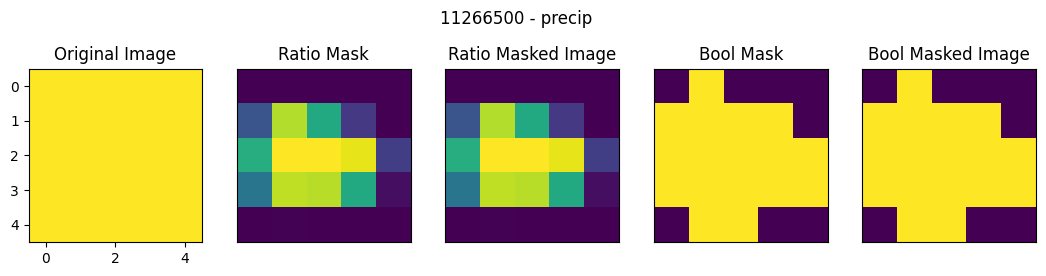

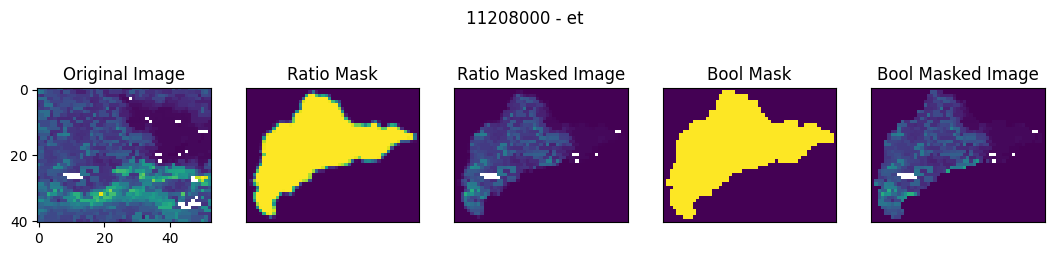

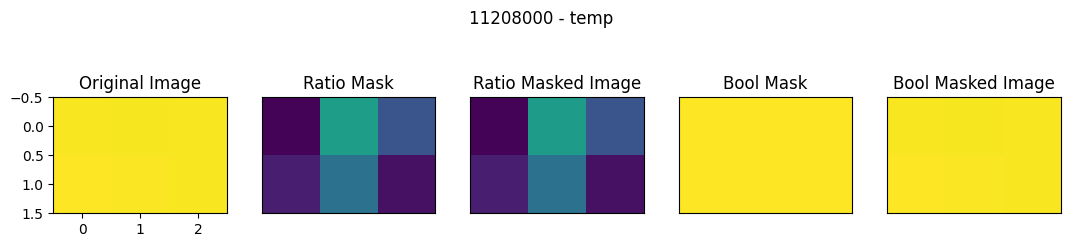

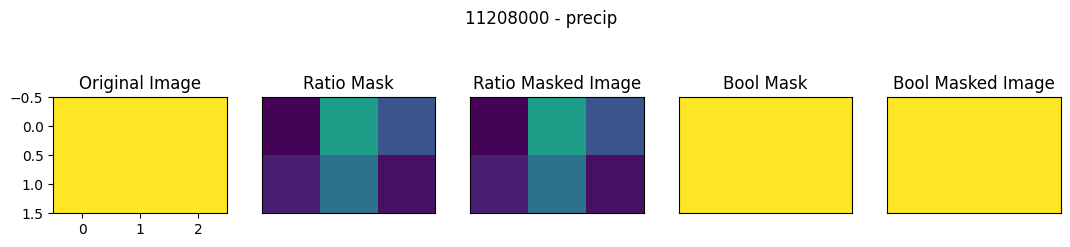

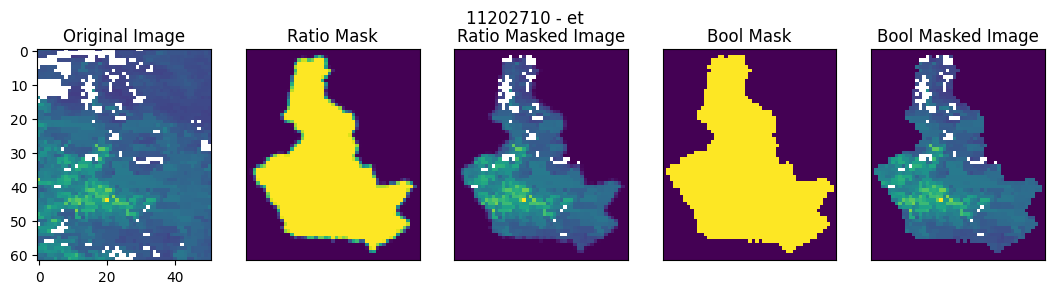

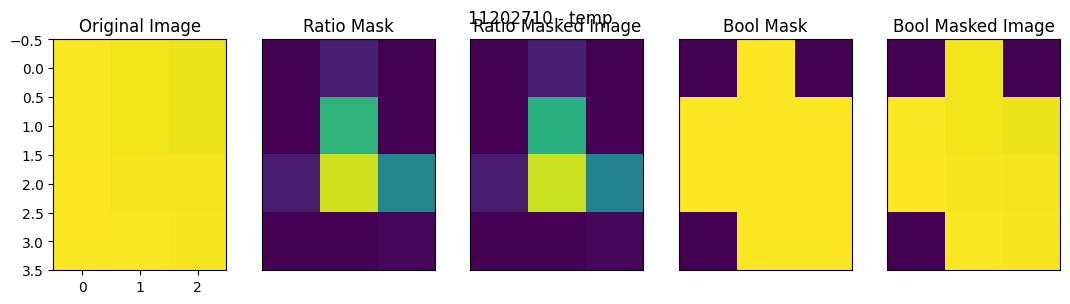

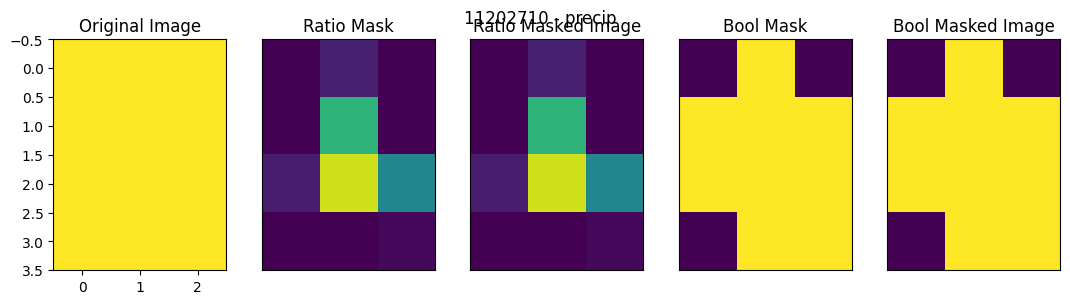

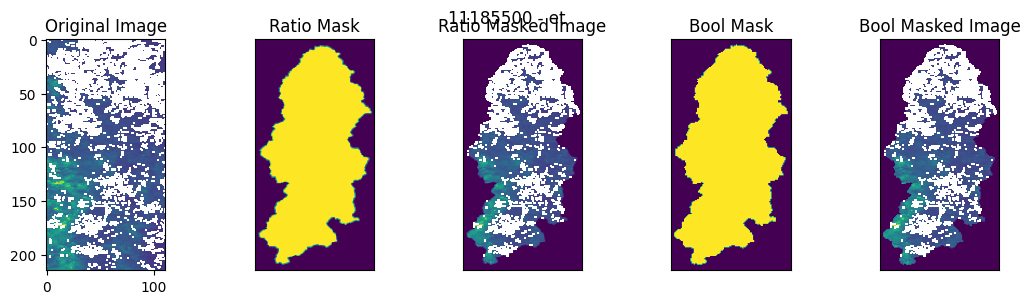

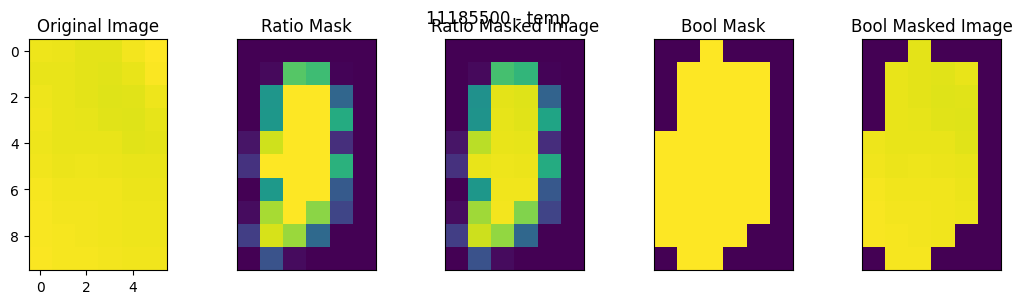

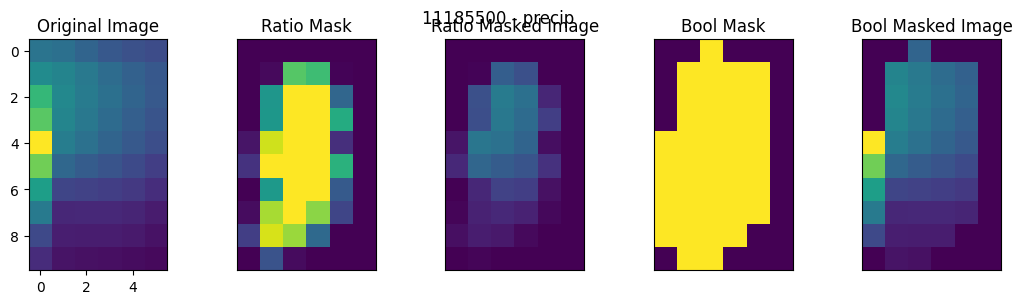

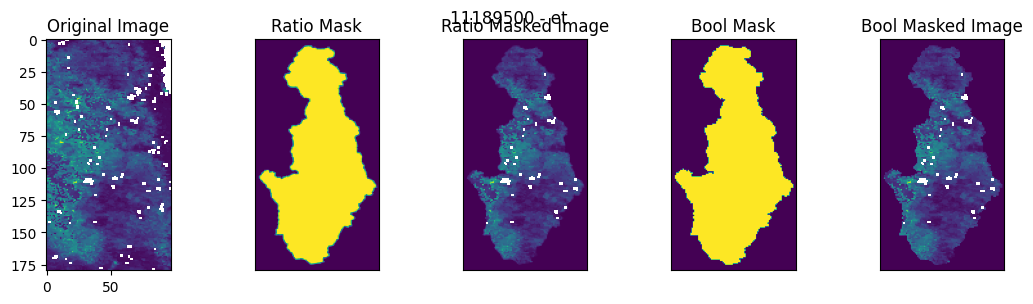

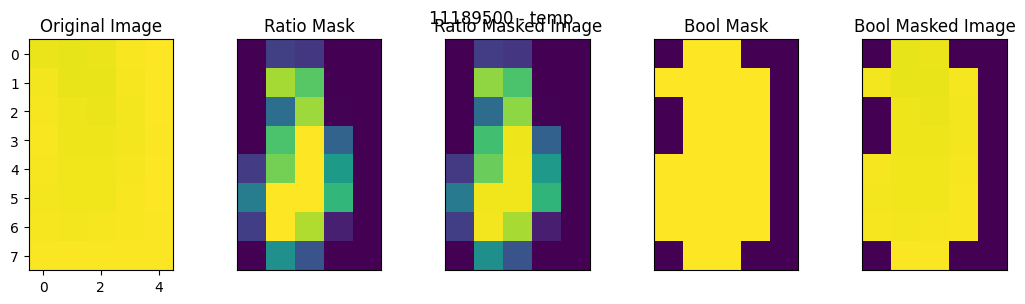

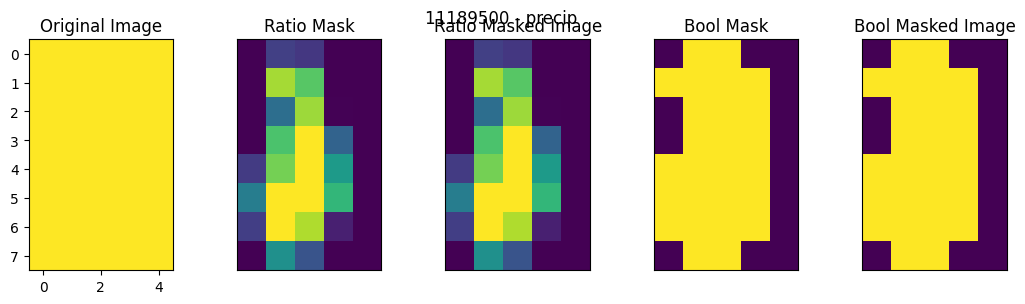

In [5]:
GAGES = ['11402000', '11318500', '11266500', '11208000', '11202710', '11185500', '11189500']
BANDS = ["et", "temp", "precip"]

for gage in GAGES:
    for band in BANDS:
        _ = plot_tif_mask(gage,  band)

## Compute masks for the DEM files

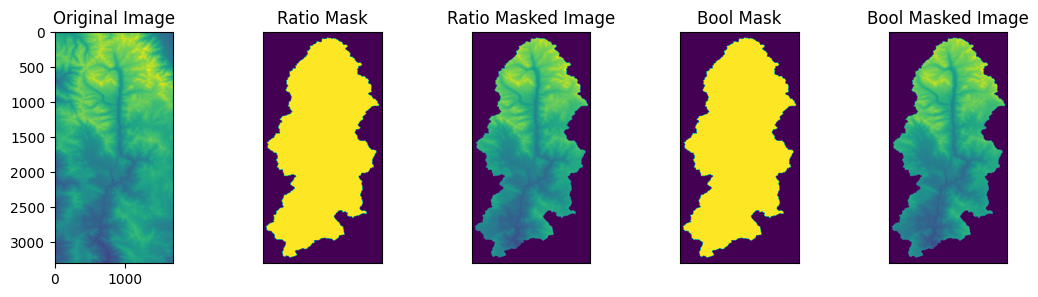

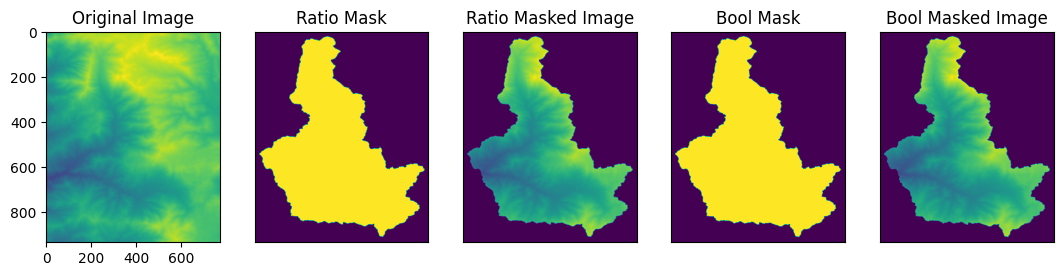

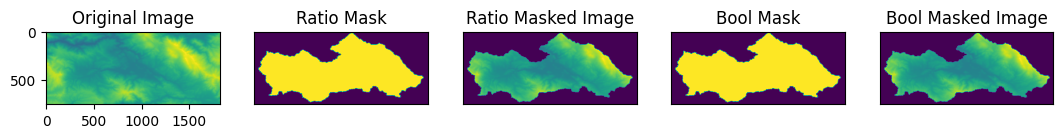

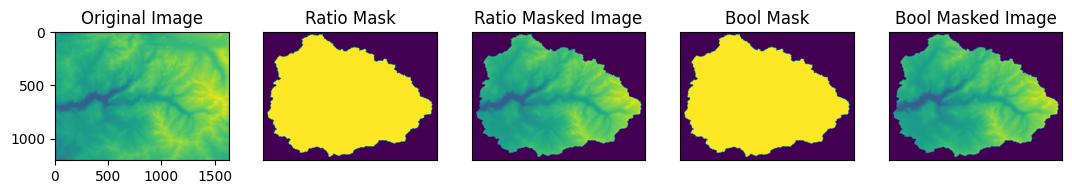

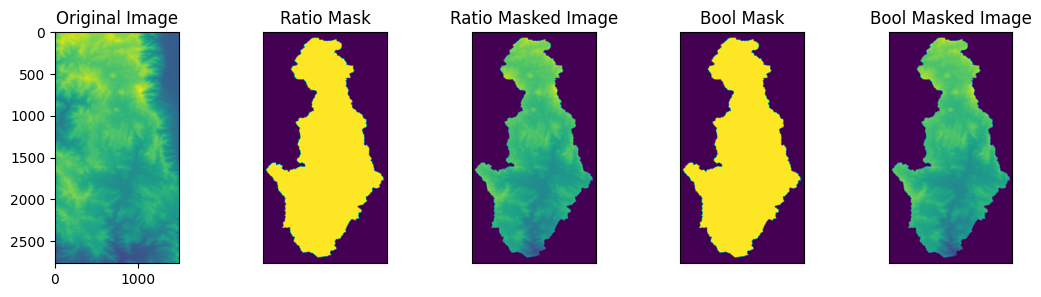

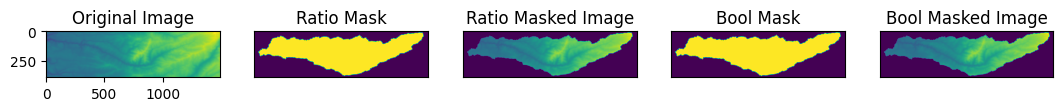

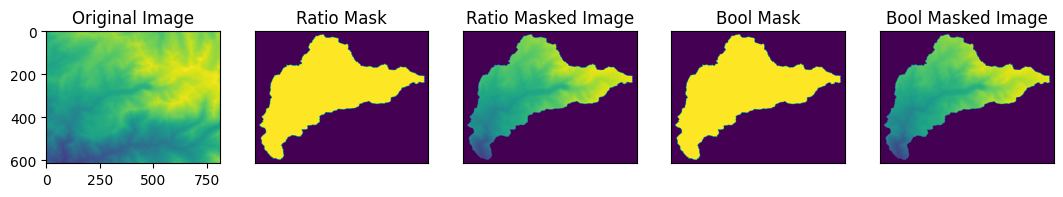

In [6]:
DEM_DIR = os.path.join(DATA_DIR, "dem")
dem_files = [f for f in os.listdir(DEM_DIR) if f.endswith(".tif")]
for dem_file in dem_files:
    streamgage = re.findall("\d{8}", dem_file)[0]  # NOQA
    fp = os.path.join(DEM_DIR, dem_file)
    dem_tif = TifFile(fp)
    dem_tif.plot_mask(streamgage, "dem")

# SWE .npy files

In [6]:
# Create the masks if not saved already:
swe_files = [f for f in os.listdir(SAMPLE_DIR) if "swe" in f]
for fn in swe_files:
    fp = os.path.join(SAMPLE_DIR, fn)
    mask = get_swe_mask(fp)

# Plot all masks

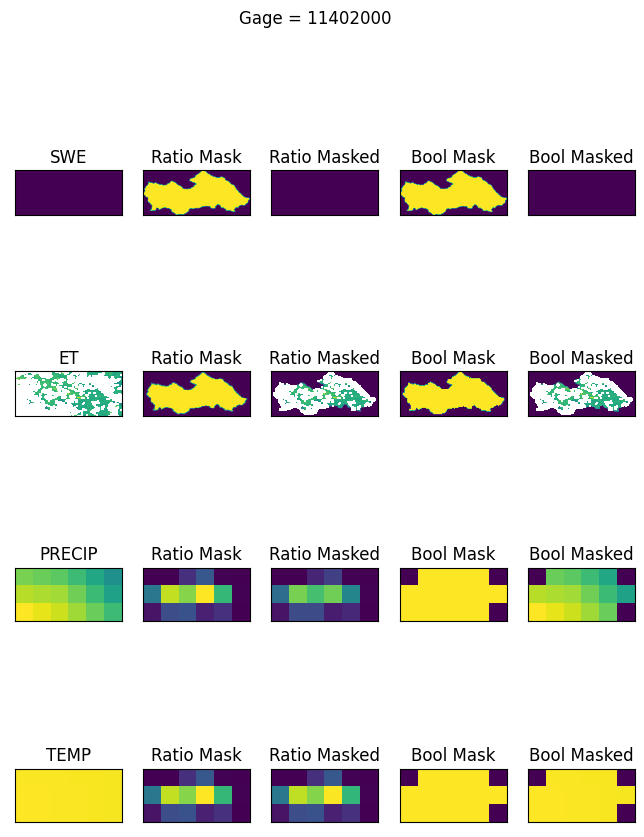

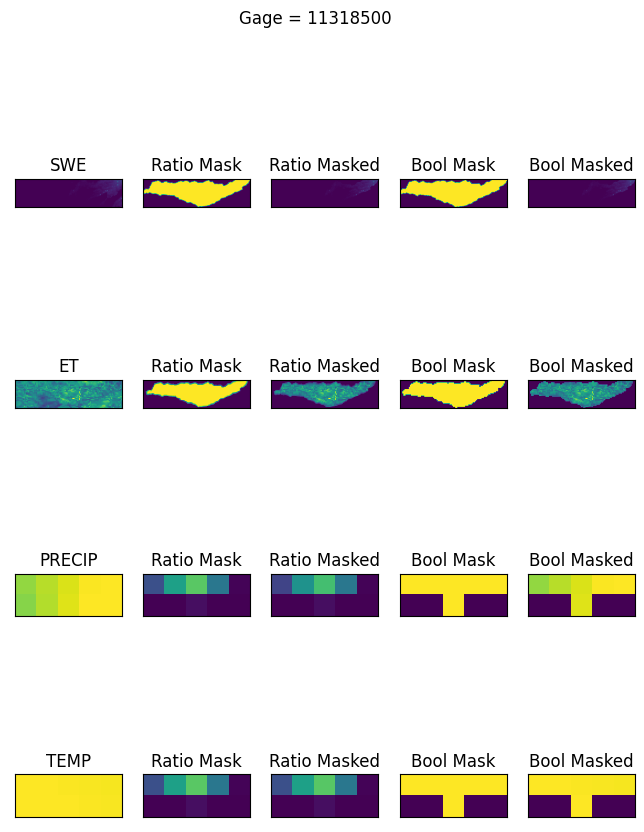

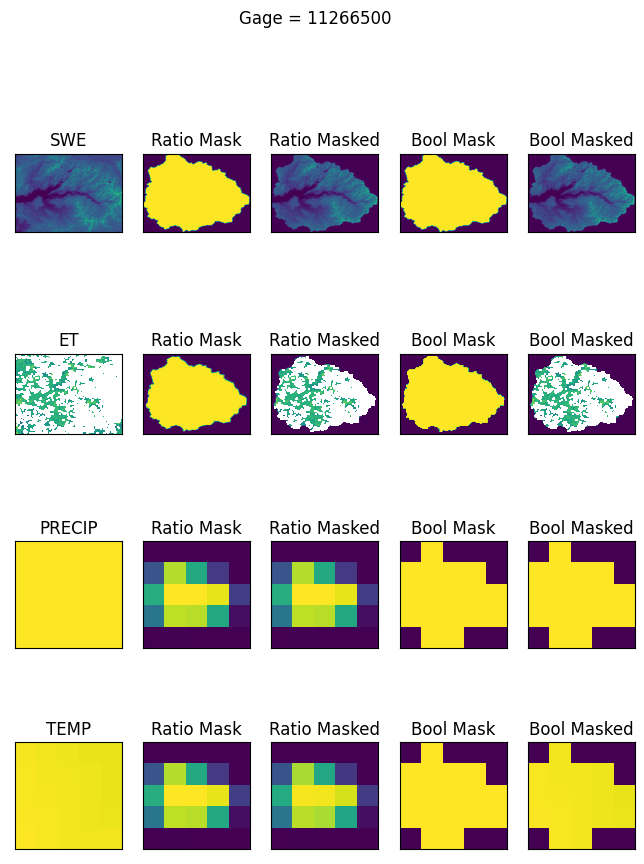

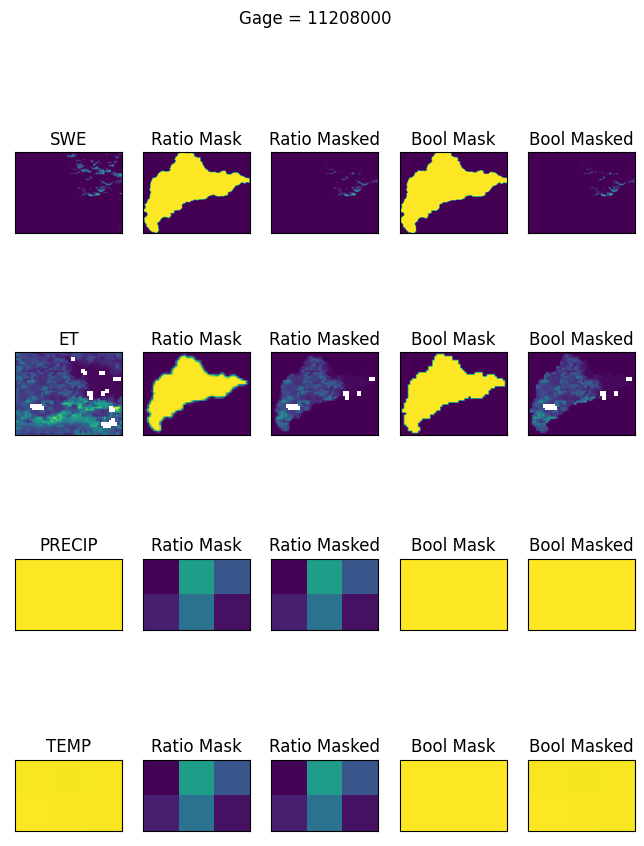

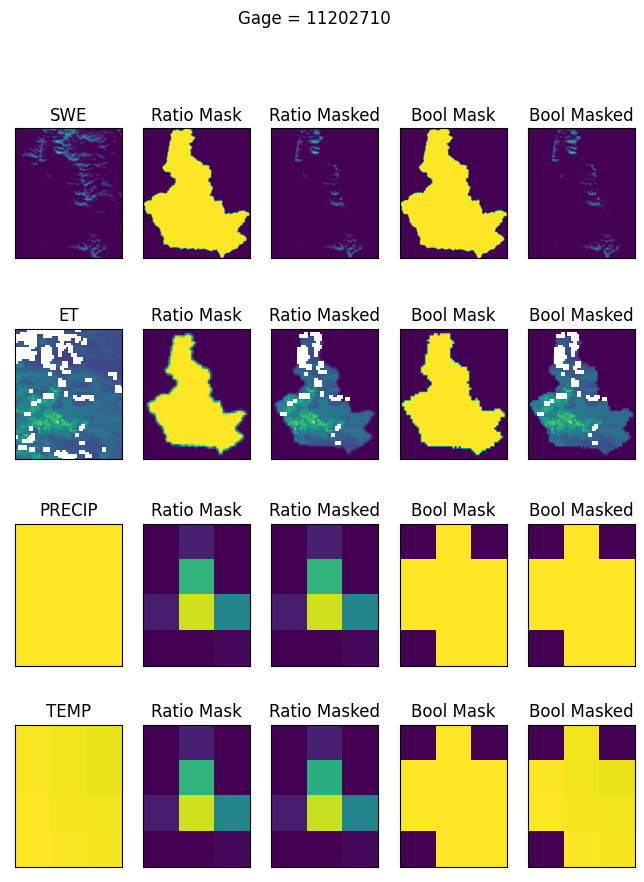

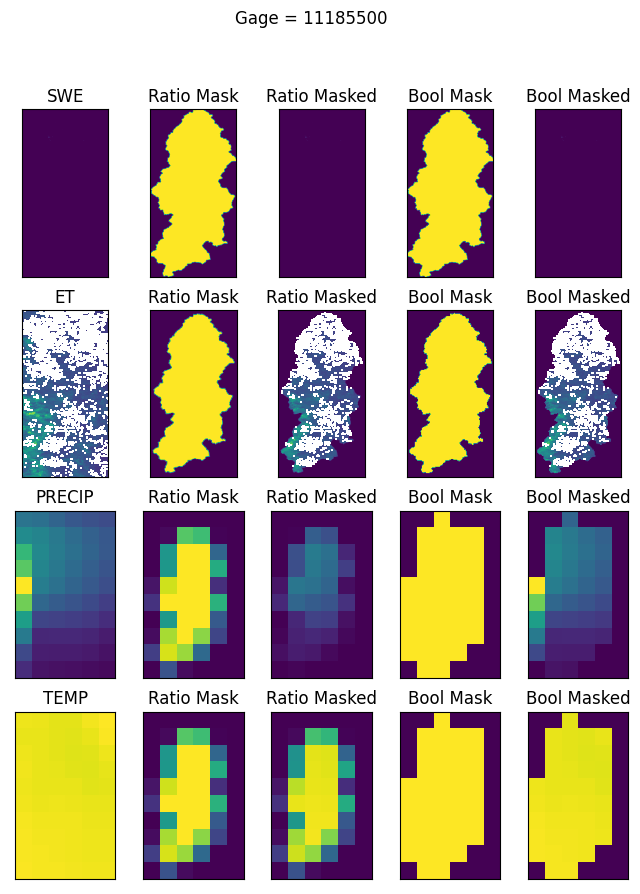

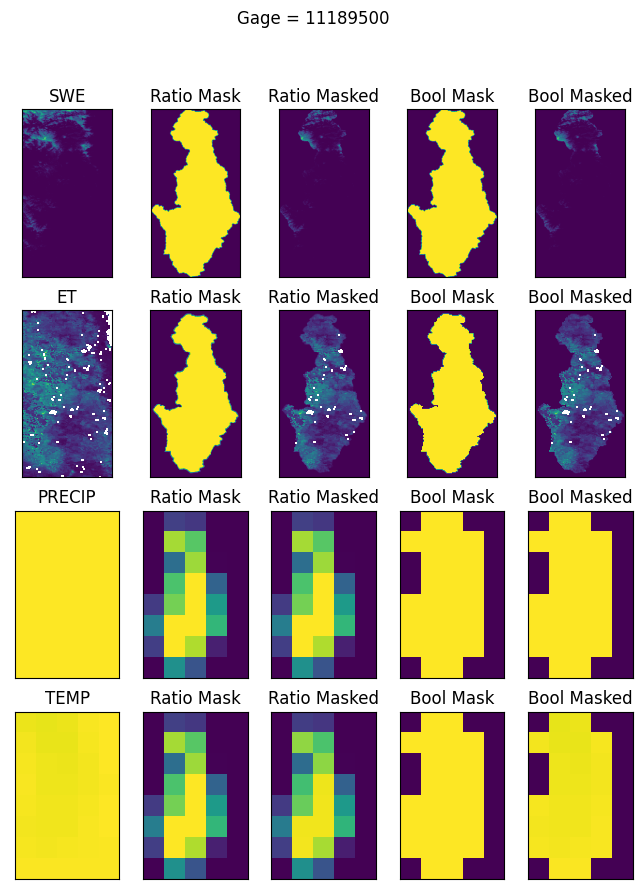

In [7]:
for gage in GAGES:
    plot_masks(gage)